In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [6]:
from google.colab import files
uploaded = files.upload()

Saving data_kaggle.xlsx to data_kaggle.xlsx


In [10]:
df = pd.read_excel("data_kaggle.xlsx")
print("Ukuran data:", df.shape)
pd.set_option('display.max_columns', None)  # biar semua kolom muncul
df.head()

Ukuran data: (203, 5)


,stn_code,mrt_station_english,mrt_station_chinese,mrt_line_english,mrt_line_chinese
0,NS1,Jurong East,裕廊东,North-South Line,南北线
1,NS2,Bukit Batok,武吉巴督,North-South Line,南北线
2,NS3,Bukit Gombak,武吉甘柏,North-South Line,南北线
3,NS4,Choa Chu Kang,蔡厝港,North-South Line,南北线
4,NS5,Yew Tee,油池,North-South Line,南北线


In [13]:
from google.colab import files
uploaded = files.upload()  # Pilih: transport_node_train_202308.csv.xlsx, 202309..., 202310...

Saving transport_node_train_202310.csv.xlsx to transport_node_train_202310.csv.xlsx
Saving transport_node_train_202309.csv.xlsx to transport_node_train_202309.csv.xlsx
Saving transport_node_train_202308.csv.xlsx to transport_node_train_202308.csv.xlsx


In [14]:
import pandas as pd

# Baca semua file Excel
df_08 = pd.read_excel("transport_node_train_202308.csv.xlsx")
df_09 = pd.read_excel("transport_node_train_202309.csv.xlsx")
df_10 = pd.read_excel("transport_node_train_202310.csv.xlsx")

# Gabungkan jadi satu DataFrame
df_all = pd.concat([df_08, df_09, df_10], ignore_index=True)

# Tampilkan info dasar
print("Jumlah baris total:", df_all.shape[0])
df_all.head()

Jumlah baris total: 20461


,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2023-08,WEEKDAY,22,TRAIN,NS28,752,311
1,2023-08,WEEKENDS/HOLIDAY,22,TRAIN,NS28,612,223
2,2023-08,WEEKENDS/HOLIDAY,0,TRAIN,DT10/TE11,37,242
3,2023-08,WEEKDAY,0,TRAIN,DT10/TE11,86,445
4,2023-08,WEEKDAY,10,TRAIN,EW16/NE3/TE17,28179,39454


In [15]:
# Simpan ke file baru
df_all.to_csv("gabungan_volume_mrt.csv", index=False)

# Unduh ke lokal
files.download("gabungan_volume_mrt.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
df_all = pd.read_csv("gabungan_volume_mrt.csv")

/tmp/ipython-input-25-1511699904.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_volume, x="YEAR_MONTH", y="TOTAL_TAP_IN_VOLUME", palette="Blues")


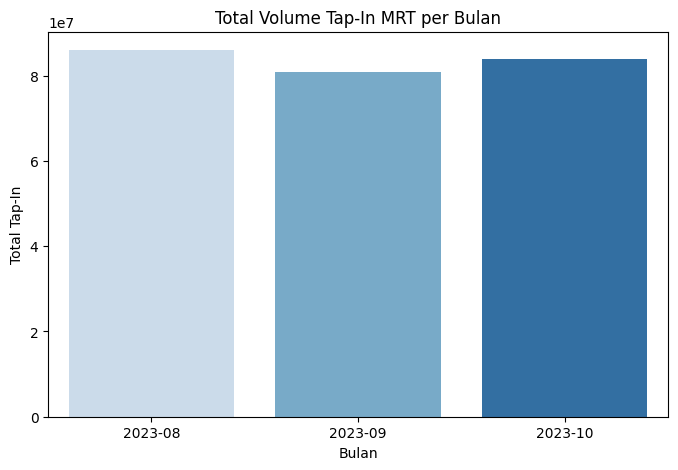

📊 Total Volume Tap-In per Bulan:
- 2023-08: 86,000,505 tap-in
- 2023-09: 80,871,211 tap-in
- 2023-10: 83,843,914 tap-in


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

monthly_volume = df_all.groupby("YEAR_MONTH")["TOTAL_TAP_IN_VOLUME"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=monthly_volume, x="YEAR_MONTH", y="TOTAL_TAP_IN_VOLUME", palette="Blues")
plt.title("Total Volume Tap-In MRT per Bulan")
plt.ylabel("Total Tap-In")
plt.xlabel("Bulan")
plt.show()

print("📊 Total Volume Tap-In per Bulan:")
for i, row in monthly_volume.iterrows():
    print(f"- {row['YEAR_MONTH']}: {row['TOTAL_TAP_IN_VOLUME']:,} tap-in")

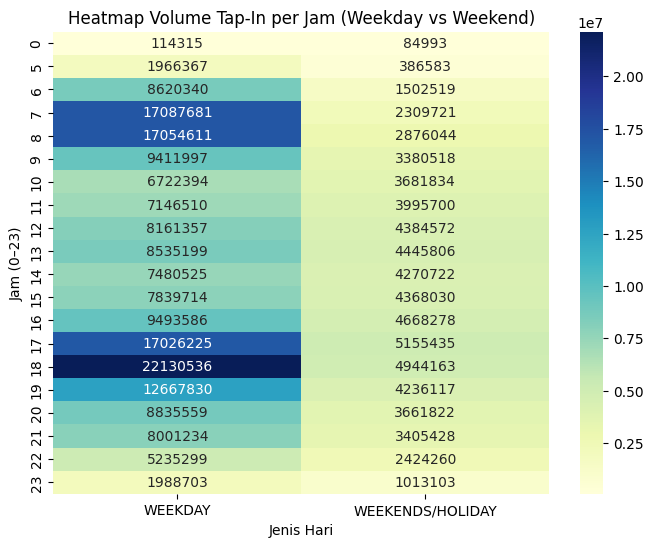

📈 Jam Tersibuk Berdasarkan Heatmap:
- Weekday: pukul 18.00 dengan 22,130,536 tap-in
- Weekend/Holiday: pukul 17.00 dengan 5,155,435 tap-in


In [24]:
heat = df_all.groupby(["TIME_PER_HOUR", "DAY_TYPE"])["TOTAL_TAP_IN_VOLUME"].sum().unstack()

plt.figure(figsize=(8,6))
sns.heatmap(heat, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap Volume Tap-In per Jam (Weekday vs Weekend)")
plt.xlabel("Jenis Hari")
plt.ylabel("Jam (0–23)")
plt.show()

peak_weekday = heat["WEEKDAY"].idxmax()
peak_weekday_vol = heat["WEEKDAY"].max()

peak_weekend = heat["WEEKENDS/HOLIDAY"].idxmax()
peak_weekend_vol = heat["WEEKENDS/HOLIDAY"].max()

print("📈 Jam Tersibuk Berdasarkan Heatmap:")
print(f"- Weekday: pukul {peak_weekday}.00 dengan {peak_weekday_vol:,} tap-in")
print(f"- Weekend/Holiday: pukul {peak_weekend}.00 dengan {peak_weekend_vol:,} tap-in")

/tmp/ipython-input-20-3400909645.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stations.values, y=top_stations.index, palette="rocket")


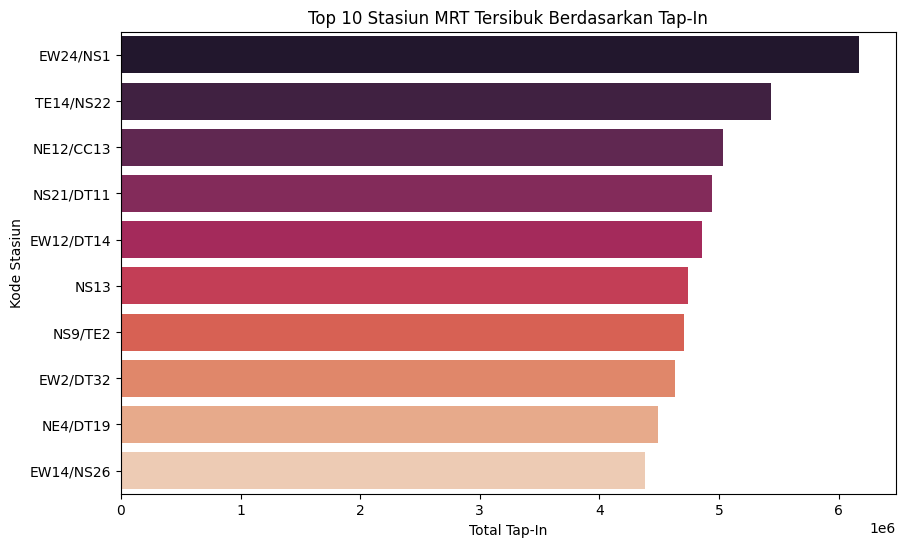

📍 10 Stasiun MRT dengan volume tap-in tertinggi:
1. Stasiun EW24/NS1: 6,170,442 tap-in
2. Stasiun TE14/NS22: 5,431,716 tap-in
3. Stasiun NE12/CC13: 5,034,938 tap-in
4. Stasiun NS21/DT11: 4,940,694 tap-in
5. Stasiun EW12/DT14: 4,859,704 tap-in
6. Stasiun NS13: 4,740,007 tap-in
7. Stasiun NS9/TE2: 4,707,349 tap-in
8. Stasiun EW2/DT32: 4,632,875 tap-in
9. Stasiun NE4/DT19: 4,486,636 tap-in
10. Stasiun EW14/NS26: 4,383,931 tap-in


In [20]:
top_stations = df_all.groupby("PT_CODE")["TOTAL_TAP_IN_VOLUME"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_stations.values, y=top_stations.index, palette="rocket")
plt.title("Top 10 Stasiun MRT Tersibuk Berdasarkan Tap-In")
plt.xlabel("Total Tap-In")
plt.ylabel("Kode Stasiun")
plt.show()

print("📍 10 Stasiun MRT dengan volume tap-in tertinggi:")
for i, (station, volume) in enumerate(top_stations.items(), start=1):
    print(f"{i}. Stasiun {station}: {volume:,} tap-in")

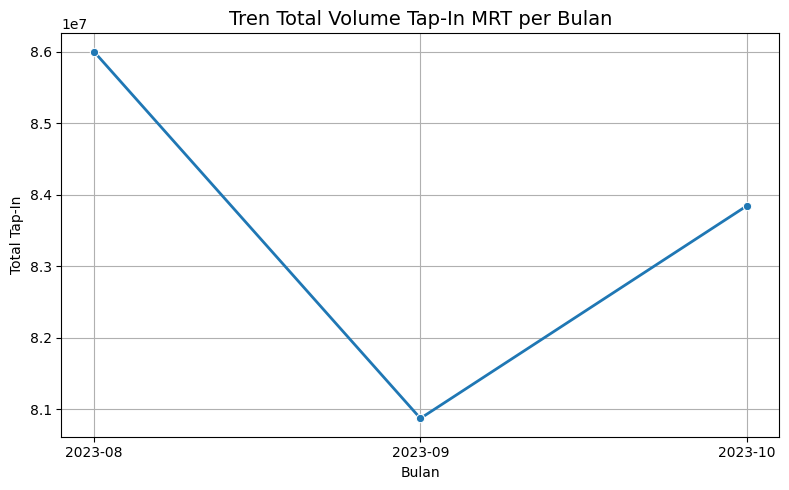

📈 Total Volume Tap-In per Bulan:
2023-08: 86,000,505 tap-in
2023-09: 80,871,211 tap-in
2023-10: 83,843,914 tap-in


In [22]:
# Agregasi total volume tap-in per bulan
monthly_volume = df_all.groupby("YEAR_MONTH")["TOTAL_TAP_IN_VOLUME"].sum().reset_index()

# Visualisasi tren per bulan
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.lineplot(data=monthly_volume, x="YEAR_MONTH", y="TOTAL_TAP_IN_VOLUME", marker='o', linewidth=2)
plt.title("Tren Total Volume Tap-In MRT per Bulan", fontsize=14)
plt.xlabel("Bulan")
plt.ylabel("Total Tap-In")
plt.grid(True)
plt.tight_layout()
plt.show()

# Cetak nilai total tap-in tiap bulan
print("📈 Total Volume Tap-In per Bulan:")
for i, row in monthly_volume.iterrows():
    print(f"{row['YEAR_MONTH']}: {row['TOTAL_TAP_IN_VOLUME']:,} tap-in")


🔮 Prediksi Sederhana Volume Tap-In Bulan November 2023:
Prediksi total tap-in: 82,765,618 tap-in


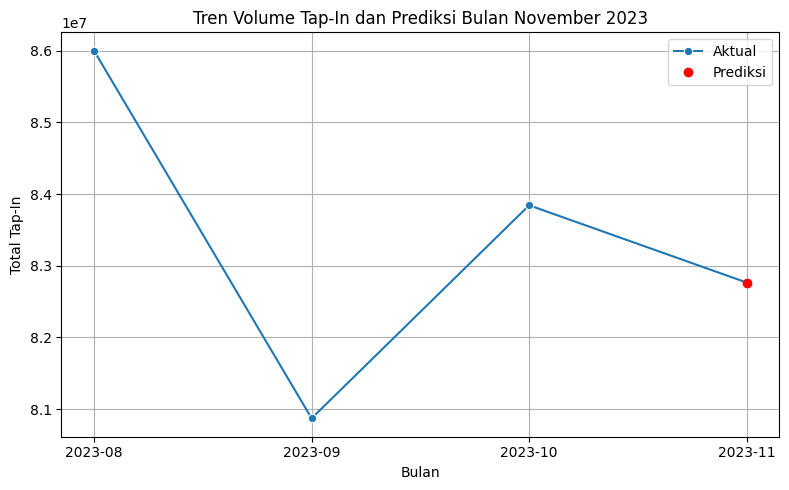

In [23]:
# Hitung selisih pertumbuhan antar bulan
monthly_volume["GROWTH"] = monthly_volume["TOTAL_TAP_IN_VOLUME"].diff()

# Rata-rata pertumbuhan
avg_growth = monthly_volume["GROWTH"][1:].mean()

# Prediksi volume bulan November
last_month_volume = monthly_volume["TOTAL_TAP_IN_VOLUME"].iloc[-1]
predicted_nov = int(last_month_volume + avg_growth)

print("\n🔮 Prediksi Sederhana Volume Tap-In Bulan November 2023:")
print(f"Prediksi total tap-in: {predicted_nov:,} tap-in")

# Gabung ke dataframe untuk visualisasi
monthly_volume_predict = monthly_volume.copy()
monthly_volume_predict.loc[len(monthly_volume_predict.index)] = ['2023-11', predicted_nov, avg_growth]

# Plot dengan prediksi
plt.figure(figsize=(8,5))
sns.lineplot(data=monthly_volume_predict, x="YEAR_MONTH", y="TOTAL_TAP_IN_VOLUME", marker='o', label="Aktual")
plt.plot('2023-11', predicted_nov, 'ro', label="Prediksi")
plt.title("Tren Volume Tap-In dan Prediksi Bulan November 2023")
plt.xlabel("Bulan")
plt.ylabel("Total Tap-In")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()